# Classification metrics

Choosing right evaluation metrics for the problem is one of the most important aspect of machine learning. Choice of metrics allows us to compare performance of different models and helps in model selection.

In this task, we will explore following metrics:

- confusion matrix
- accuracy
- precision
- recall
- f1 score

## Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Uncomment below 2 lines to ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# Load the train and test data
train = pd.read_csv('Data/ozone_levels_train.csv')
test  = pd.read_csv('Data/ozone_levels_test.csv')

In [3]:
train

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_63,F_64,F_65,F_66,F_67,F_68,F_69,F_70,F_71,class
0,2.5,3.5,4.4,4.6,4.4,3.5,4.2,4.5,4.2,4.6,...,0.07000,26.290000,-2.370000,5705.000000,-19.400000,23.400000,10315.000000,-0.130416,0.00,0.0
1,1.2,0.7,0.3,0.1,0.3,0.4,0.6,1.1,1.9,2.4,...,0.24000,15.800000,2.100000,5710.000000,-17.500000,19.000000,10210.000000,15.000000,0.00,0.0
2,0.1,0.4,0.6,0.4,1.0,1.7,0.7,1.3,2.3,2.4,...,0.12000,31.640000,-5.240000,5745.000000,-16.900000,25.900000,10175.000000,85.000000,0.00,0.0
3,0.6,0.9,1.0,0.6,0.7,0.7,0.8,1.4,2.6,2.6,...,0.19000,1.220000,-0.280000,5835.000000,-9.550000,42.150000,10215.000000,5.000000,0.00,0.0
4,0.1,0.4,0.3,0.1,0.1,0.0,0.9,1.9,2.0,2.0,...,0.87000,1.650000,1.510000,5835.000000,32.950000,47.300000,10170.000000,15.000000,0.97,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,1.3,1.1,0.8,0.4,0.7,0.4,0.3,1.3,2.0,1.9,...,0.10000,9.867313,0.831892,5875.000000,20.700000,40.300000,10155.000000,-0.130416,2.97,0.0
1771,0.8,1.3,1.4,0.9,1.0,0.3,0.4,1.3,1.6,2.7,...,0.10000,0.530000,-1.680000,5900.000000,18.300000,34.900000,10150.000000,20.000000,0.00,0.0
1772,2.0,1.4,1.9,1.6,1.2,1.4,1.7,3.0,3.8,4.7,...,0.30467,9.867313,0.831892,5818.898515,10.510812,37.388366,10164.180664,-0.130416,0.00,0.0
1773,3.0,1.9,1.3,1.7,1.7,1.1,1.4,0.8,1.6,2.6,...,0.04000,17.200000,-3.710000,5795.000000,2.200000,36.500000,10170.000000,-40.000000,0.00,0.0


In [4]:
test.head()

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_63,F_64,F_65,F_66,F_67,F_68,F_69,F_70,F_71,class
0,4.0,3.7,2.9,3.6,2.4,2.9,2.0,2.0,3.2,3.8,...,0.47,27.66,11.94,5605.0,10.70,31.95,10240.0,10.0,0.0,0.0
1,2.2,2.9,3.4,4.2,4.7,4.7,5.3,4.9,5.2,6.0,...,0.20,19.22,18.21,5515.0,-10.10,42.00,10065.0,25.0,0.0,0.0
2,2.7,2.2,2.3,2.5,2.6,2.9,3.2,2.9,3.6,4.2,...,0.10,14.22,-2.98,5690.0,0.70,32.70,10105.0,-55.0,0.0,0.0
3,1.5,1.3,1.8,1.4,1.2,1.7,1.6,1.4,1.6,3.0,...,0.54,13.07,9.15,5820.0,1.95,39.35,10220.0,-25.0,0.0,0.0
4,2.6,2.7,2.2,1.4,1.6,1.9,2.6,3.5,4.2,4.5,...,0.26,-1.52,-4.53,5910.0,27.70,43.70,10110.0,-30.0,0.0,0.0


### X and Y

In [5]:
# Define X and y
X_train = np.array(train.iloc[:, :72])
X_test  = np.array(test.iloc[:, :72])
y_train = np.array(train.iloc[:, 72:])
y_test  = np.array(test.iloc[:, 72:])

In [6]:
# To check if the data is correctly segregated
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")

X_train: (1775, 72) , y_train: (1775, 1)
X_test: (761, 72) , y_test: (761, 1)


### Models

In [7]:
# Initialize the models
# Classifier 1 - Logistic regression
clf1 = LogisticRegression()
# Classifier 2 - Decision tree
clf2 = DecisionTreeClassifier(random_state=0)

In [8]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\varun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [9]:
# Predict on testing data
y_pred_lr = clf1.predict(X_test).reshape((-1,1))
y_pred_dt = clf2.predict(X_test).reshape((-1,1))

In [10]:
y_pred_lr.shape

(761, 1)

In [11]:
y_test.shape

(761, 1)

### Primary building blocks of classification metrics

A **TRUE POSITIVE (TP)** is an outcome where the model correctly predicts the positive class.

A **TRUE NEGATIVE (TN)** is an outcome where the model correctly predicts the negative class.

A **FALSE POSITIVE (FP)** is an outcome where the model incorrectly predicts the positive class.

a **FALSE NEGATIVE (FN)** is an outcome where the model incorrectly predicts the negative class.

In [12]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    return TP, TN, FP, FN

In [13]:
# Compute primary metrics for logisitc regression
lr_true_positive, lr_true_negative, lr_false_positive, lr_false_negative = perf_measure(y_test, y_pred_lr)
print(lr_true_positive, lr_true_negative, lr_false_positive, lr_false_negative)

1 732 8 20


In [14]:
# Compute primary metrics for decision tree
dt_true_positive, dt_true_negative, dt_false_positive, dt_false_negative = perf_measure(y_test, y_pred_dt)
print(dt_true_positive, dt_true_negative, dt_false_positive, dt_false_negative)

3 707 33 18


## Confusion matrix
A confusion matrix is visualization technique to summarize the basic performance of a classification algorithm.

Confusion matrix

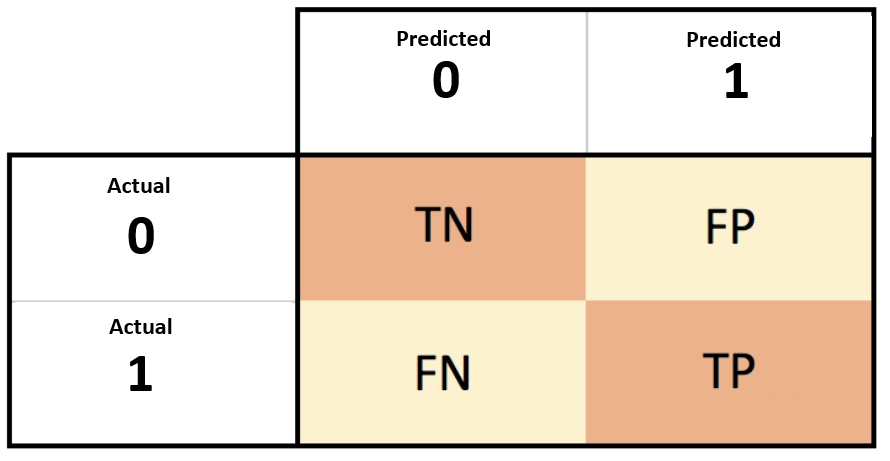

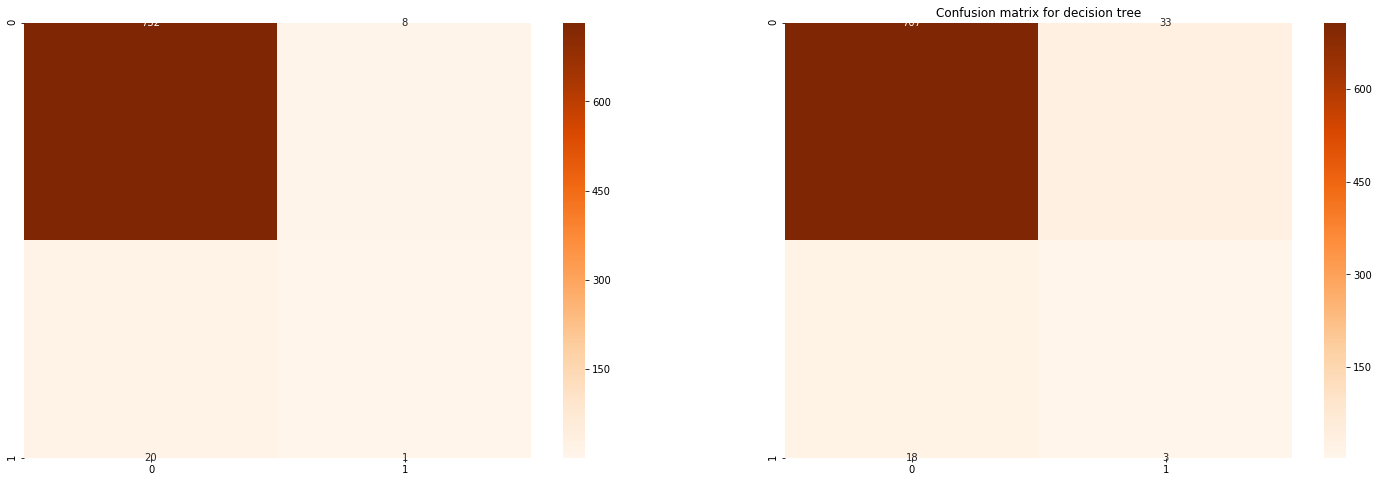

In [15]:
# Plot confusion matrix, DO NOT EDIT THE CELL
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,8))

plt.title("Confusion matrix for logistic regression")
sns.heatmap(np.array([[lr_true_negative, lr_false_positive],[lr_false_negative, lr_true_positive]]), annot=True, cmap=plt.cm.Oranges, fmt='g', ax=axes[0])
plt.title("Confusion matrix for decision tree")
sns.heatmap(np.array([[dt_true_negative, dt_false_positive],[dt_false_negative, dt_true_positive]]), annot=True, cmap=plt.cm.Oranges, fmt='g', ax=axes[1])

plt.show()


**Accuracy**

Classification accuracy is simply the rate of correct classifications

$$Accuracy = \frac{Number \, of \, correct \, predictions}{Total \, number \, of \, predictions}$$

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [16]:
# Classification accuracy for logistic regression
lr_accuracy = (lr_true_positive + lr_true_negative)/(lr_true_positive + lr_true_negative + lr_false_positive + lr_false_negative)

# Classification accuracy for decision tree
dt_accuracy = (dt_true_positive + dt_true_negative)/(dt_true_positive + dt_true_negative + dt_false_positive + dt_false_negative)

In [17]:
print("Classificaton accuracy: LR = " , lr_accuracy)
print("Classificaton accuracy: DT = " , dt_accuracy)

Classificaton accuracy: LR =  0.9632063074901446
Classificaton accuracy: DT =  0.9329829172141918


**Precision**

What proportion of positive identifications was actually correct
$$Precision = \frac{TP}{TP+FP}$$

In [18]:
# Precision for logistic regression
try:
    lr_precision = lr_true_positive/(lr_true_positive + lr_false_positive)
except:
    lr_precision = 0
    print("If you see this message, it means that the\ndenominator of precision for logistic regression turned out to be 0 ")


# Precision for decision tree
try:
    dt_precision = dt_true_positive/(dt_true_positive + dt_false_positive)
except:
    dt_precision = 0
    print("If you see this message, it means that the\ndenominator of precision for decision tree turned out to be 0 ")

In [19]:
print("Precision: LR = " , lr_precision)
print("Precision: DT = " , dt_precision)

Precision: LR =  0.1111111111111111
Precision: DT =  0.08333333333333333


**Recall**

What proportion of actual positives was identified correctly
$$Recall = \frac{TP}{TP+FN}$$

In [20]:
# Recall for logistic regression
try:
    lr_recall = lr_true_positive/(lr_true_positive + lr_false_negative)
except:
    lr_recall = 0
    print("If you see this message, it means that the\ndenominator of recall for logistic regression turned out to be 0 ")

    
# Recall for decision tree
try:
    dt_recall = dt_true_positive/(dt_true_positive + dt_false_negative)
except:
    dt_recall = 0
    print("If you see this message, it means that the\ndenominator of recall for decision tree turned out to be 0 ")

In [21]:
print("Recall: LR = " , lr_recall)
print("Recall: DT = " , dt_recall)

Recall: LR =  0.047619047619047616
Recall: DT =  0.14285714285714285


**F1 score**

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.
$$ F1 \, score = \frac{2* Precision * Recall}{Precision + Recall}$$

In [22]:
# F1 score for logistic regression
lr_f1_score = 2 * lr_precision * lr_recall / (lr_precision + lr_recall)

# F1 score for decision tree
dt_f1_score = 2 * dt_precision * dt_recall / (dt_precision + dt_recall)

In [23]:
print("F1 score: LR = " , lr_f1_score)
print("F1 score: DT = " , dt_f1_score)

F1 score: LR =  0.06666666666666667
F1 score: DT =  0.10526315789473685


**Area Under ROC Curve**

A ROC Curve is a plot of the true positive rate and the false positive rate for a given set of probability predictions at different thresholds used to map the probabilities to class labels. The area under the curve is then the approximate integral under the ROC Curve.

Metrices:

**Sensitivity, hit rate, recall, or true positive rate:**
$$TPR = TP/(TP+FN)$$

**Specificity or true negative rate:**
$$TNR = TN/(TN+FP)$$

**Precision or positive predictive value:**
$$PPV = TP/(TP+FP)$$

**Negative predictive value:**
$$NPV = TN/(TN+FN)$$

**Fall out or false positive rate:**
$$FPR = FP/(FP+TN)$$

**False negative rate:**
$$FNR = FN/(TP+FN)$$

**False discovery rate:**
$$FDR = FP/(TP+FP)$$

In [24]:
# False positive rate for logisitic regression
lr_false_positive_rate = lr_false_positive/(lr_false_positive + lr_true_negative)
# True positive rate for logisitic regression
lr_true_positive_rate = lr_recall

# False positive rate for decision trees
dt_false_positive_rate = dt_false_positive/(dt_false_positive + dt_true_negative)
# True positive rate for decision trees
dt_true_positive_rate = dt_recall

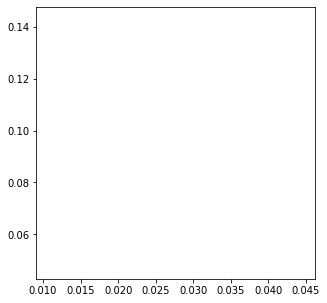

In [26]:
fog = plt.figure(figsize=(5, 5))
plt.plot(dt_false_positive_rate, dt_true_positive_rate, linestyle='--', label='Decision Tree')
plt.plot(lr_false_positive_rate, lr_true_positive_rate, marker='.', label='Logistic')
plt.show()

## Checking the graph

In [30]:
from sklearn.metrics import roc_curve

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

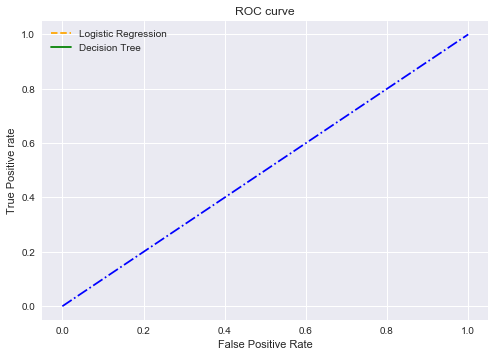

In [31]:
plt.style.use('seaborn')
plt.plot(lr_false_positive_rate, lr_true_positive_rate, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(dt_false_positive_rate, dt_true_positive_rate, linestyle='-',color='green', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='-.', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();